In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import warnings
warnings.filterwarnings('ignore')


In [164]:
iris = pd.read_csv("C:/Users/koush/Downloads/IRIS.csv")

In [165]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [166]:
iris.shape

(150, 5)

In [167]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [168]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


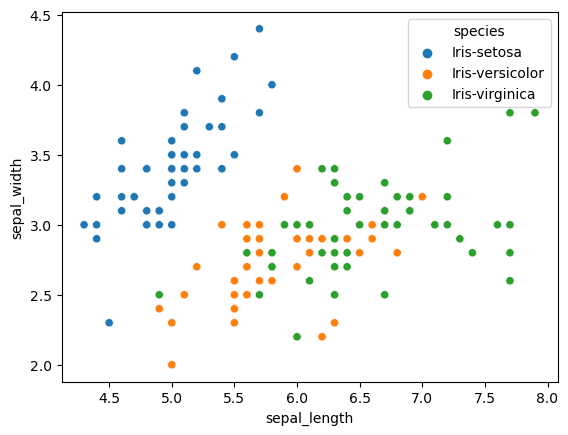

In [169]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris)
plt.show()

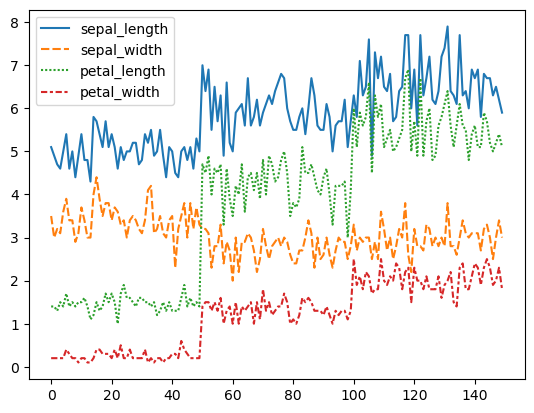

In [170]:
sns.lineplot(data=iris.drop(['species'], axis=1))
plt.show()

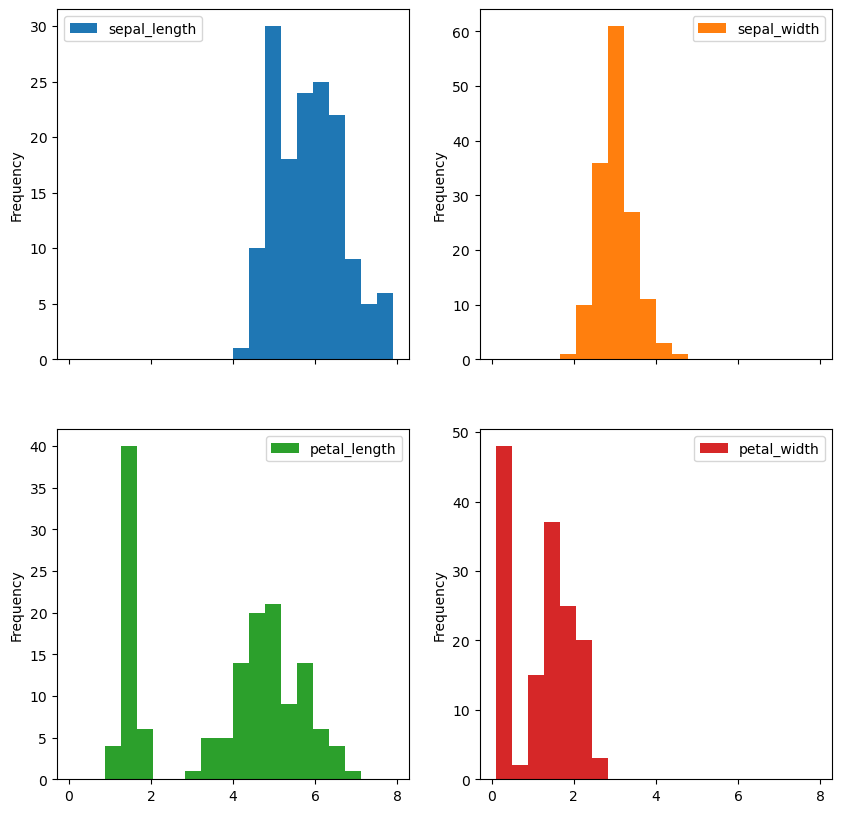

In [171]:

iris.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)
plt.show()


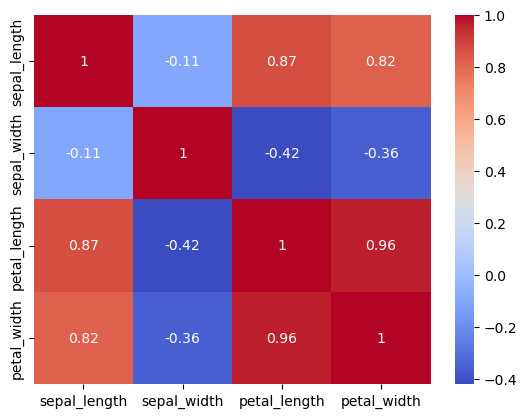

In [172]:
iris_numeric = iris.select_dtypes(include='number')
sns.heatmap(iris_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()


In [173]:
iris_numeric = iris.select_dtypes(include=['number'])
iris_numeric.corr().style.background_gradient(cmap='coolwarm').format(precision=2)


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.11,0.87,0.82
sepal_width,-0.11,1.00,-0.42,-0.36
petal_length,0.87,-0.42,1.00,0.96
petal_width,0.82,-0.36,0.96,1.00


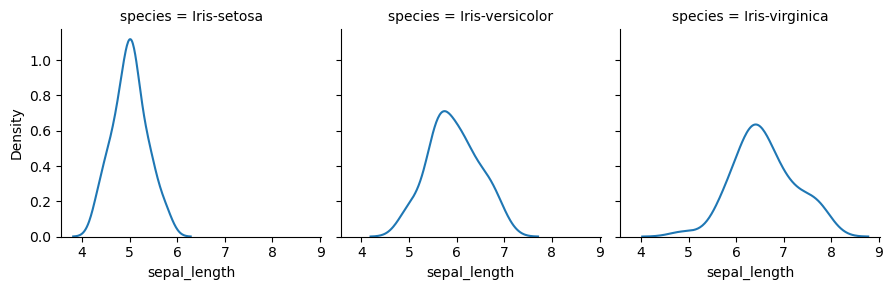

In [174]:
g = sns.FacetGrid(iris, col='species')
g = g.map(sns.kdeplot, 'sepal_length')

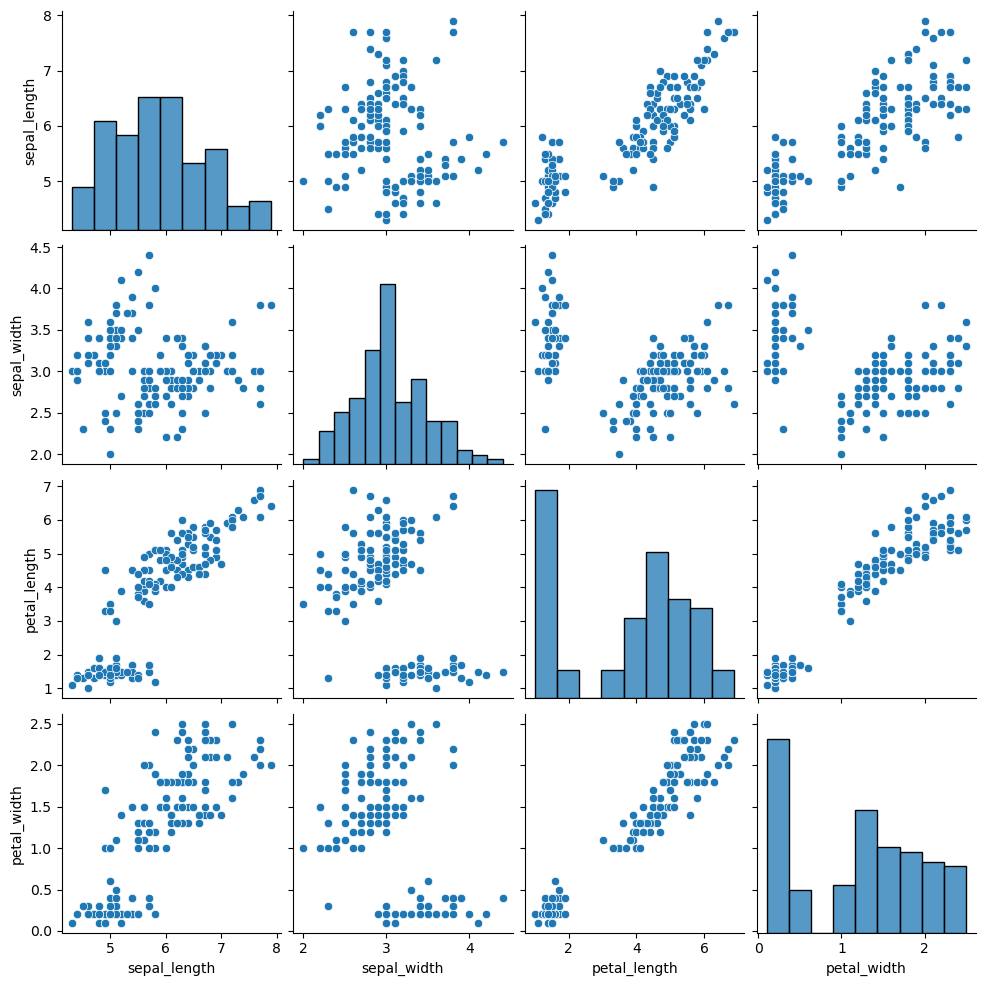

In [175]:
sns.pairplot(iris)

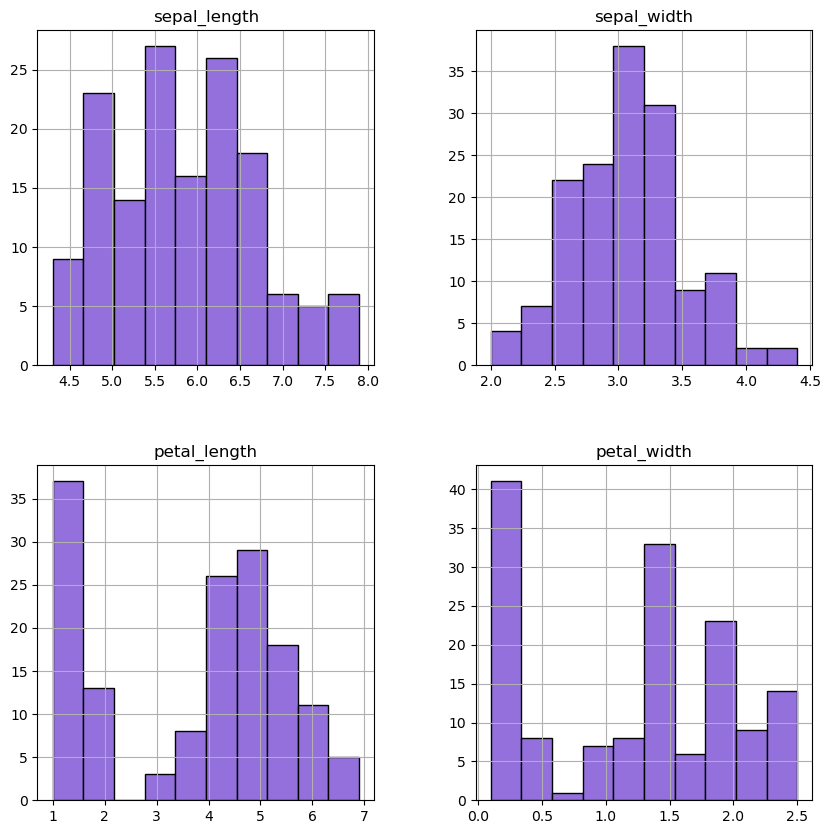

In [176]:
iris.hist(color= 'mediumpurple' ,edgecolor='black',figsize=(10,10))
plt.show()

In [177]:
numeric_iris = iris.select_dtypes(include='number')
numeric_iris.corr().style.background_gradient(cmap='coolwarm').format(precision=2)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.11,0.87,0.82
sepal_width,-0.11,1.00,-0.42,-0.36
petal_length,0.87,-0.42,1.00,0.96
petal_width,0.82,-0.36,0.96,1.00


In [178]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [179]:
x = iris.drop('species', axis=1)
y= iris.species

In [180]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=5)

In [181]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(x_train, y_train)


KNeighborsClassifier()

In [182]:
knn.score(x_test, y_test)

0.9666666666666667

In [183]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x, y)
y_pred = logreg.predict(x)
print(metrics.accuracy_score(y, y_pred))

0.9733333333333334


In [184]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train, y_train)


SVC(gamma=0.1, random_state=0)

In [185]:
svm.score(x_test, y_test)

0.9833333333333333

In [186]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)


DecisionTreeClassifier()

In [187]:
dtree.score(x_test, y_test)

0.9666666666666667